# Prova 2 - Projeto Digital Signal Processing 

- Aluno : Efrain Marcelo Pulgar Pantaleon
- Matricula : 20190077934

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
import soundfile as sf
stl.use('default')
PI = np.pi

In [2]:
signal , sample_rate = sf.read('audioprova2.wav')
period = 1/sample_rate
time = np.arange(0,len(signal)*period,period)

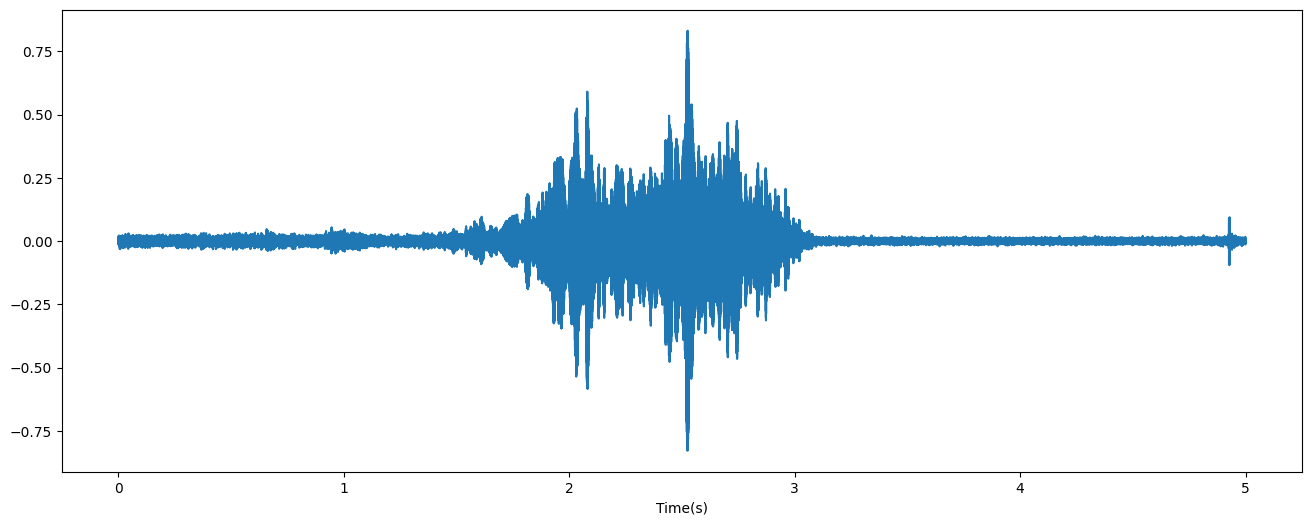

In [3]:
plt.figure(figsize=(16,6))
plt.plot(time,signal)
plt.xlabel("Time(s)")
plt.show()

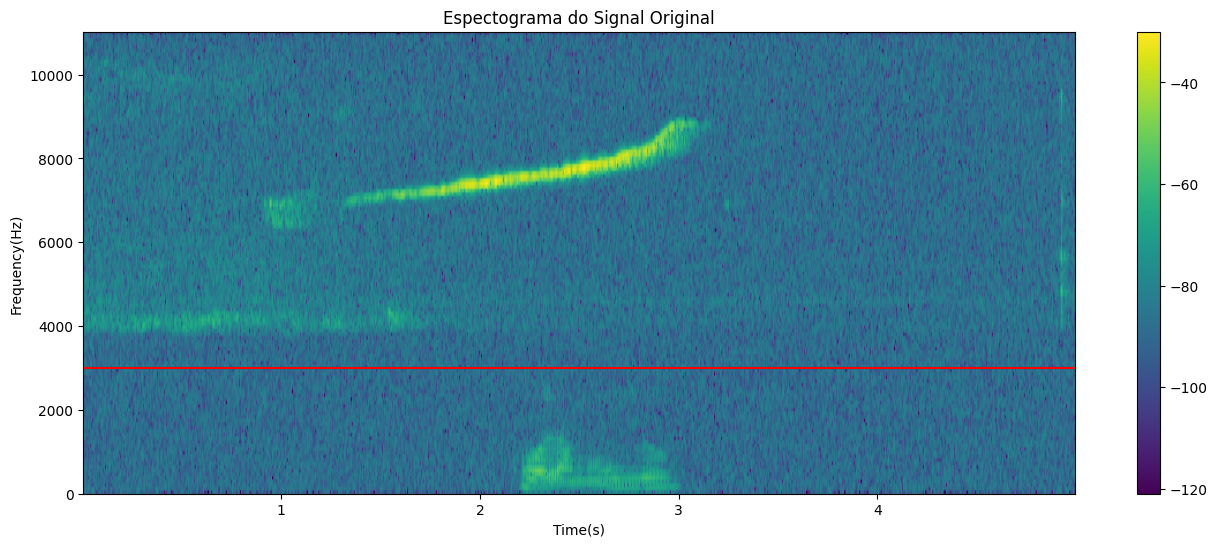

In [48]:
plt.figure(figsize=(16,6))
plt.specgram(signal,Fs=sample_rate)
plt.axhline(y=3000, xmin=0, xmax=len(signal)*period , color='red')
plt.title("Espectograma do Signal Original")
plt.xlabel("Time(s)")
plt.ylabel("Frequency(Hz)")
plt.colorbar()
plt.clim(-30,-110)
plt.show()

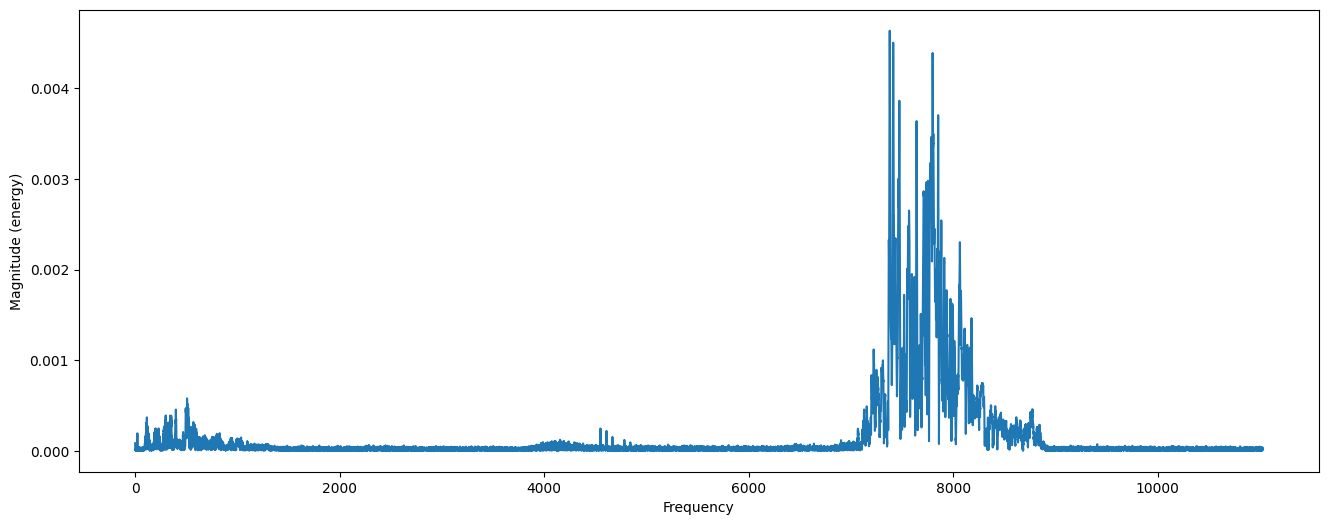

In [5]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(signal,Fs=sample_rate)
plt.show()

## Exercicio 1 - Filtragem usando filtro FIR

### a) Obtendo a resposta ao impulso para a frequencia de corte desejada
- Filtro FIR passa-baixa
- Frequencia de Corte será de 3000 Hz
- Filtro de 101 Coeficientes
- Utilizar a janela Kaiser que permita uma atenuação de 100 dB na frequência de corte


In [6]:
fc = 3000 # cutt-off frequency in Hz
wc = PI*fc/(sample_rate/2)
M = 101 #Number of Coefficients
M1 = -(M-1)/2
M2 = (M-1)/2
n1 = np.arange(M1,M2+1) # 101 samples 
hlp = (wc/PI)*(np.sin(wc*n1))/(wc*n1)
hlp[n1 == 0] = wc/PI

C:\Users\efrai\AppData\Local\Temp\ipykernel_20052\2895745383.py:7: RuntimeWarning: invalid value encountered in true_divide
  hlp = (wc/PI)*(np.sin(wc*n1))/(wc*n1)


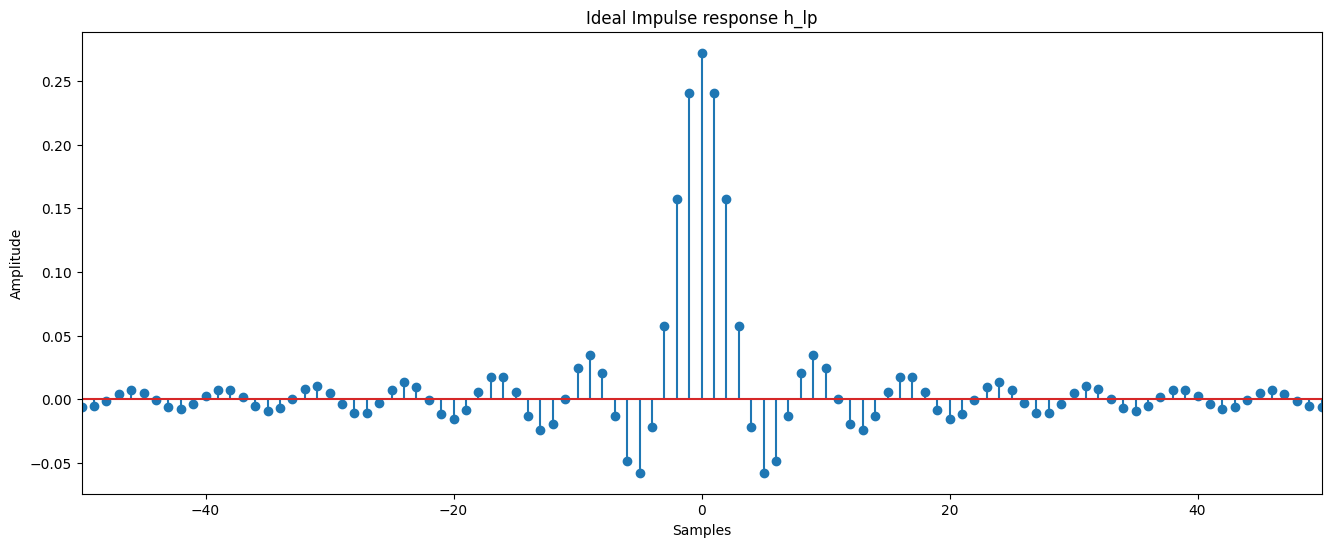

In [7]:
#Rectangular window
plt.figure(figsize=(16,6))
plt.stem(n1,hlp)
plt.title("Ideal Impulse response h_lp")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.xlim((M1,M2))
plt.show()

In [8]:
# Kaiser Window
r = 100 # Controls the dBs below the mainlobe magnitude.
beta = 0.1102*(r - 8.7)
kaiser_window = np.kaiser(M,beta)

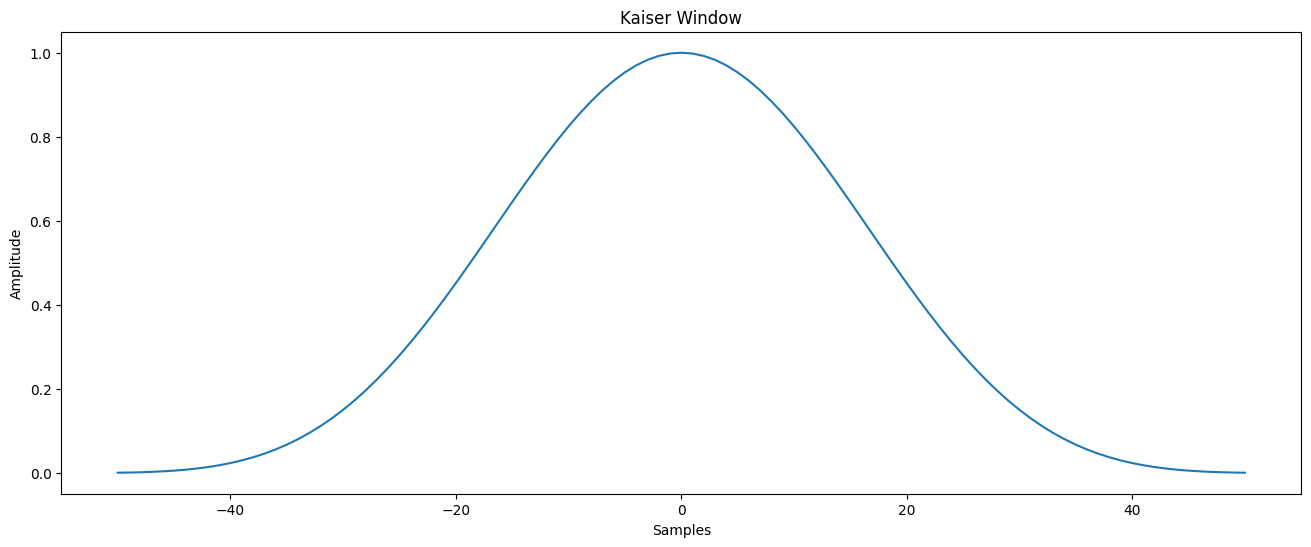

In [9]:
plt.figure(figsize=(16,6))
plt.plot(n1,kaiser_window)
plt.title("Kaiser Window")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

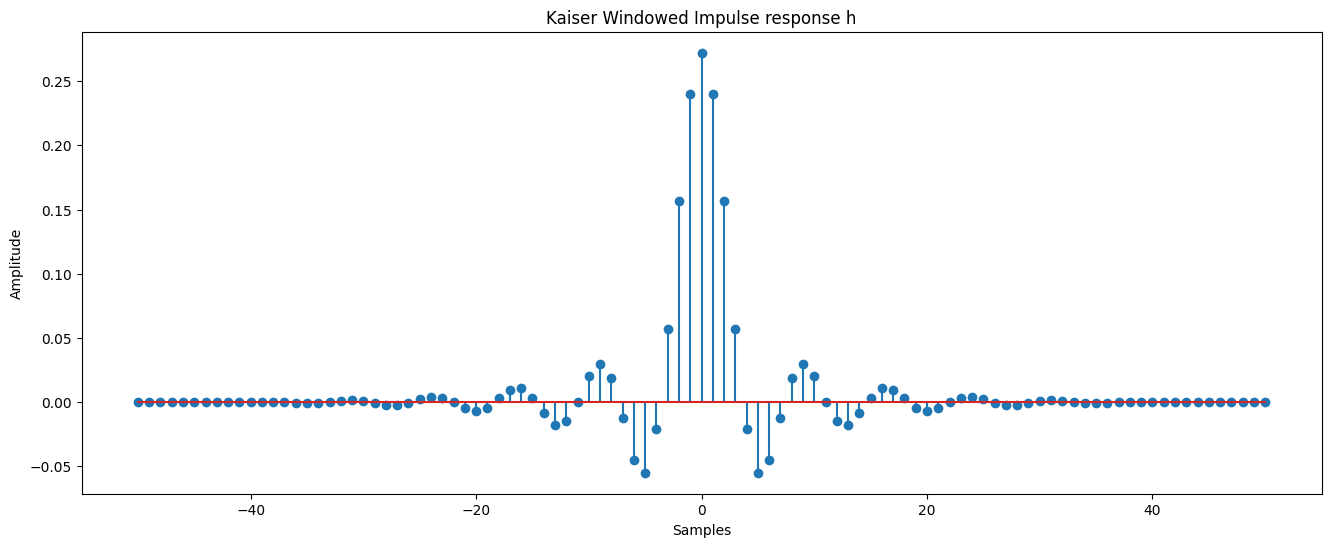

In [10]:
#Obtain hlp into Kaiser Window
hlp_kaiser = hlp * kaiser_window 
plt.figure(figsize=(16,6))
plt.stem(n1,hlp_kaiser)
plt.title("Kaiser Windowed Impulse response h")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

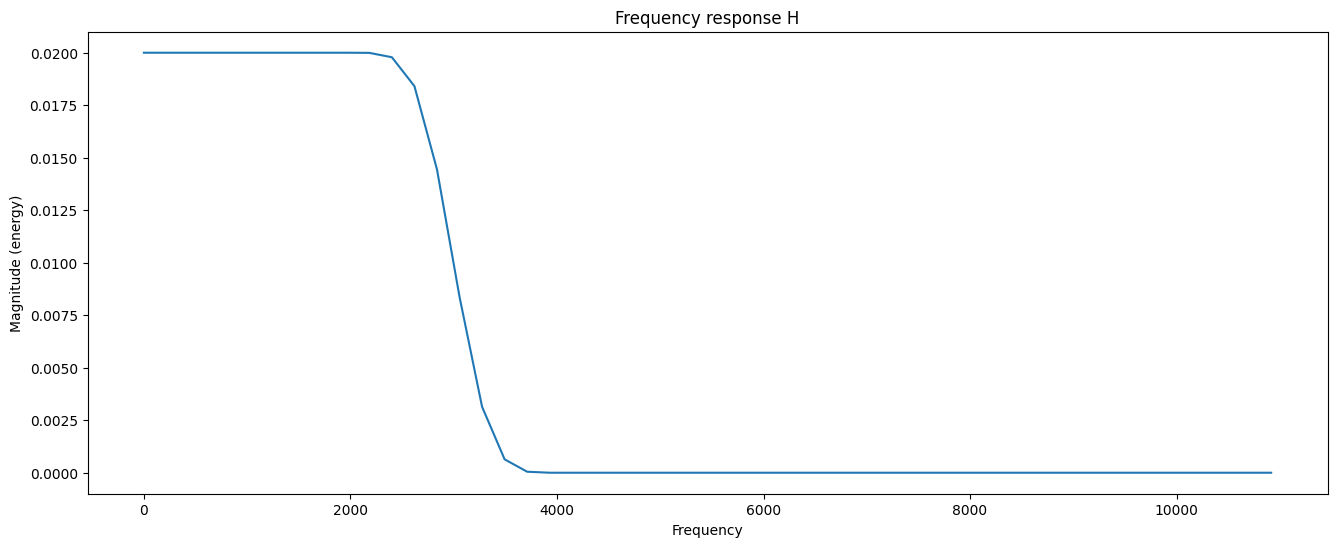

In [11]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(hlp_kaiser,Fs=sample_rate)
plt.title("Frequency response H")
plt.show()

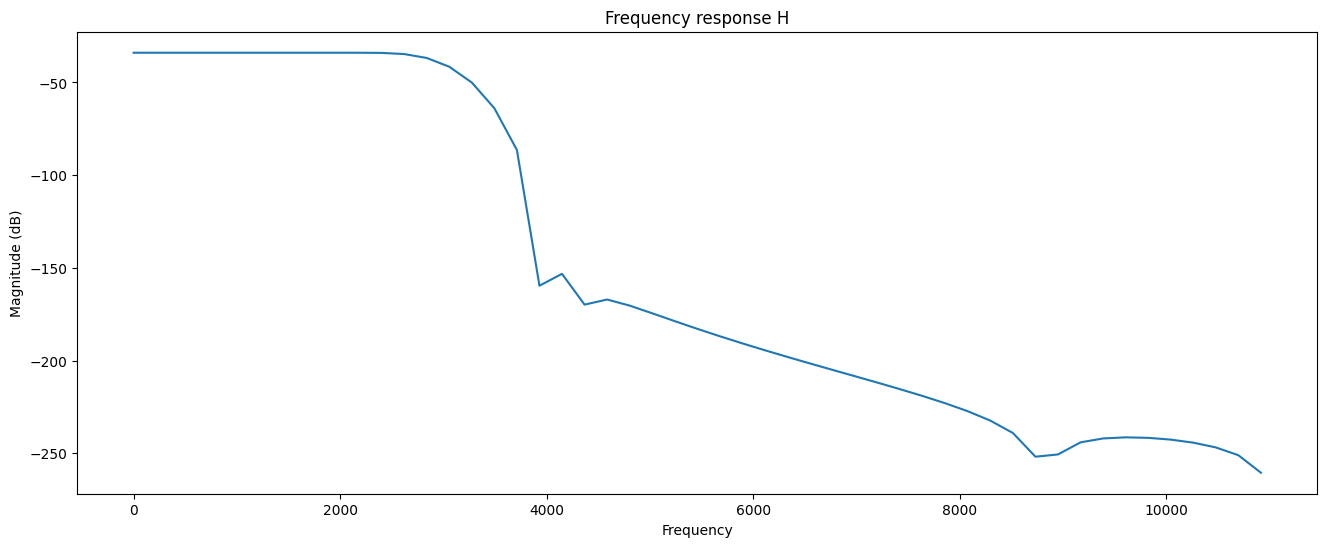

In [12]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(hlp_kaiser,Fs=sample_rate,scale='dB')
plt.title("Frequency response H")
plt.show()

### b) Usando os coeficientes do Filtro encontrado, filtramos o sinal original e plotaremos ele

In [13]:
signal_filtered = np.convolve(signal,hlp_kaiser)

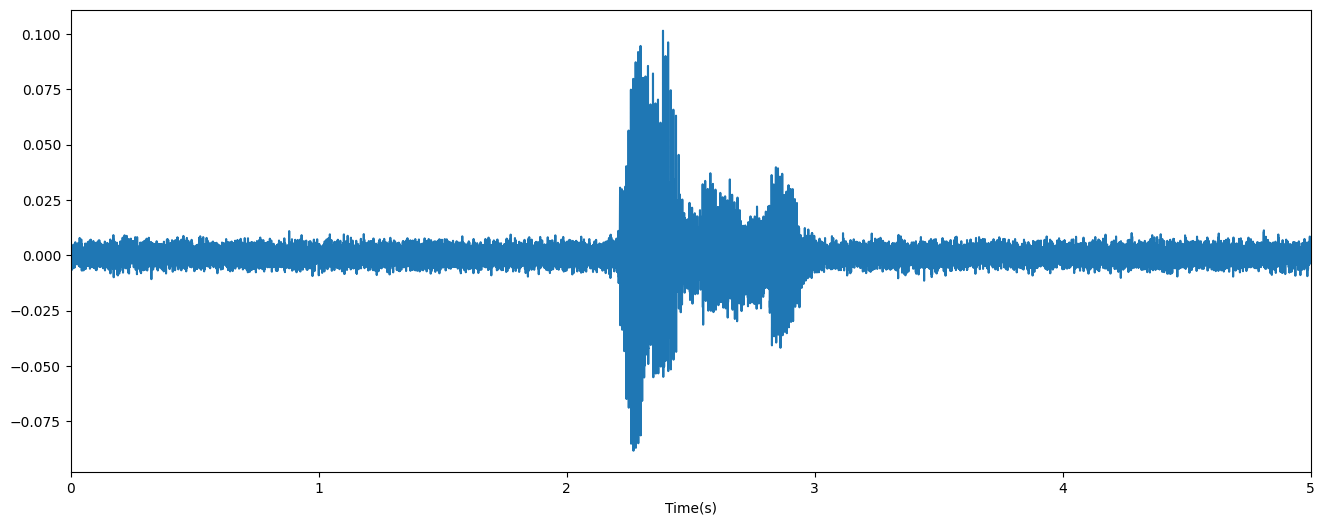

In [14]:
plt.figure(figsize=(16,6))
plt.plot(time,signal_filtered[M-1:])
plt.xlabel("Time(s)")
plt.xlim((0,len(signal)*period))
plt.show()

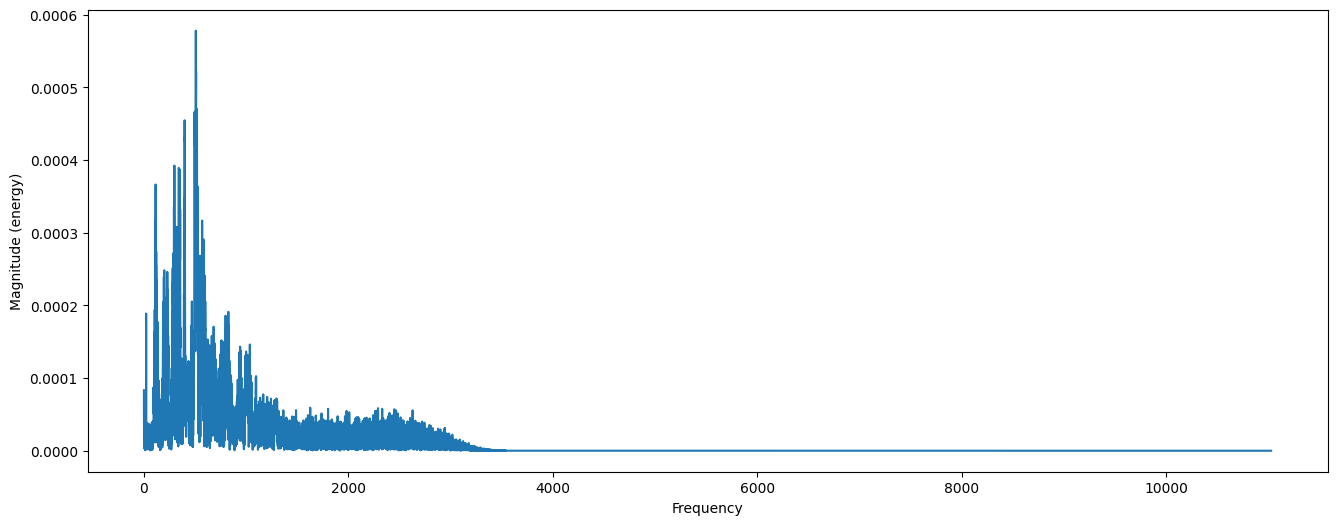

In [15]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(signal_filtered,Fs=sample_rate)
plt.show()

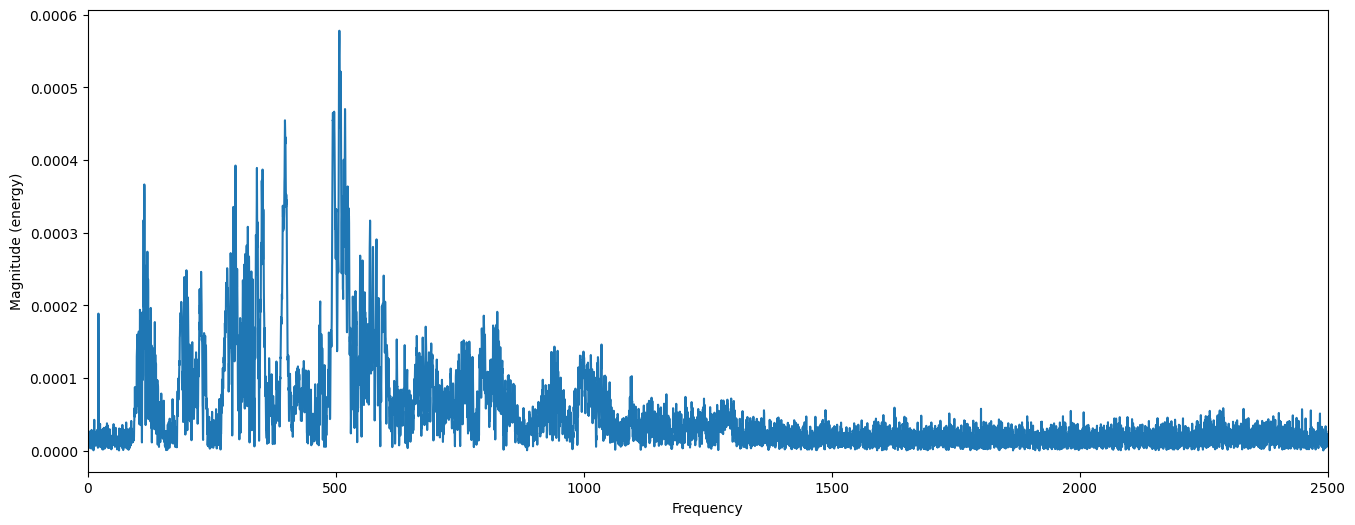

In [16]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(signal_filtered,Fs=sample_rate)
plt.xlim((0,2500))
plt.show()

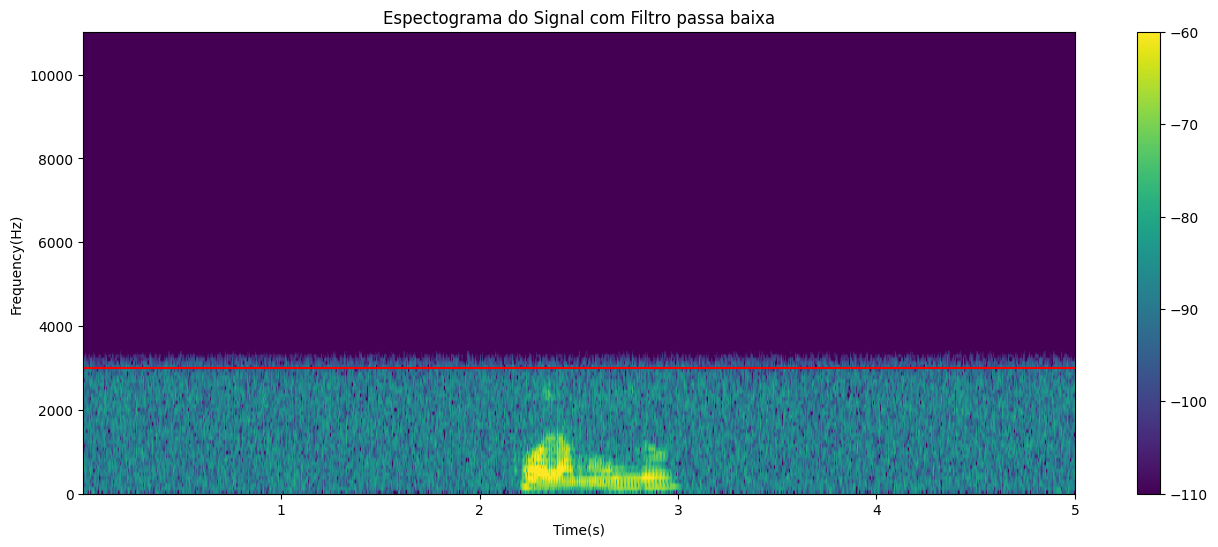

In [49]:
plt.figure(figsize=(16,6))
plt.specgram(signal_filtered,Fs=sample_rate)
plt.axhline(y=3000, xmin=0, xmax=len(signal)*period , color='red')
plt.title("Espectograma do Signal com Filtro passa baixa")
plt.xlabel("Time(s)")
plt.ylabel("Frequency(Hz)")
plt.colorbar()
plt.clim(-60, -100)
plt.show()

In [17]:
sf.write('prova2_filtrado.wav',signal_filtered,sample_rate)

## 2 - Obtenção de um filtro passa-altas

### a) Obtenha os coeficientes de um filtro passa-altas


In [18]:
index_pos_max = np.where(hlp_kaiser == max(hlp_kaiser))[0][0]
b_impulse = np.zeros(M)
b_impulse[index_pos_max] = 1
b_HP = b_impulse - hlp_kaiser

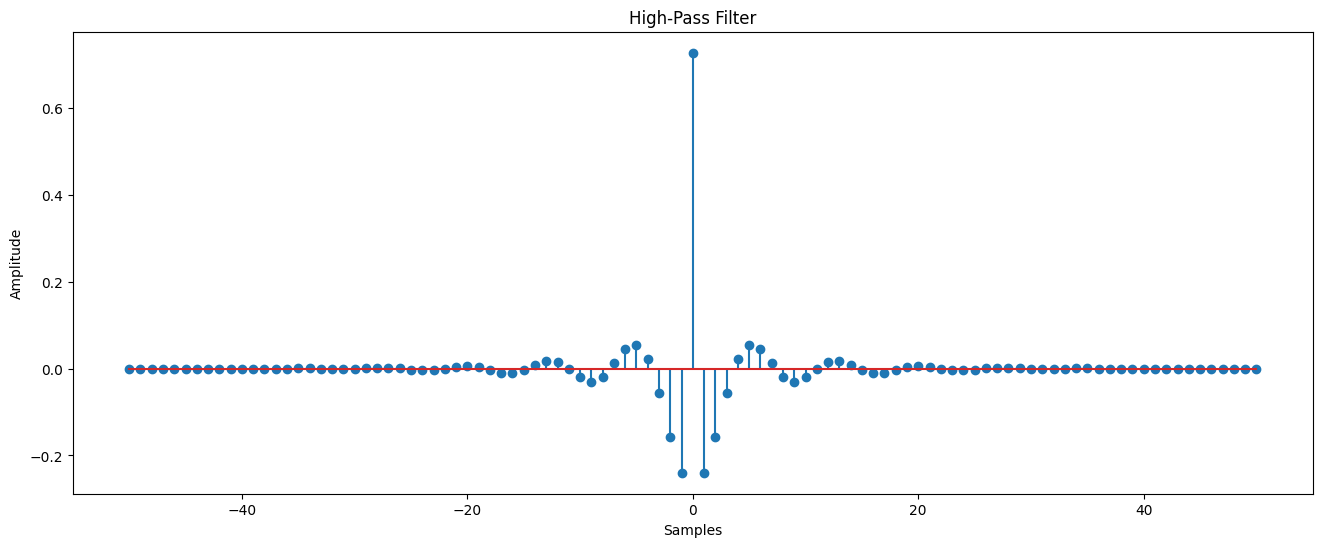

In [33]:
plt.figure(figsize=(16,6))
plt.stem(n1,b_HP)
plt.title("High-Pass Filter")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

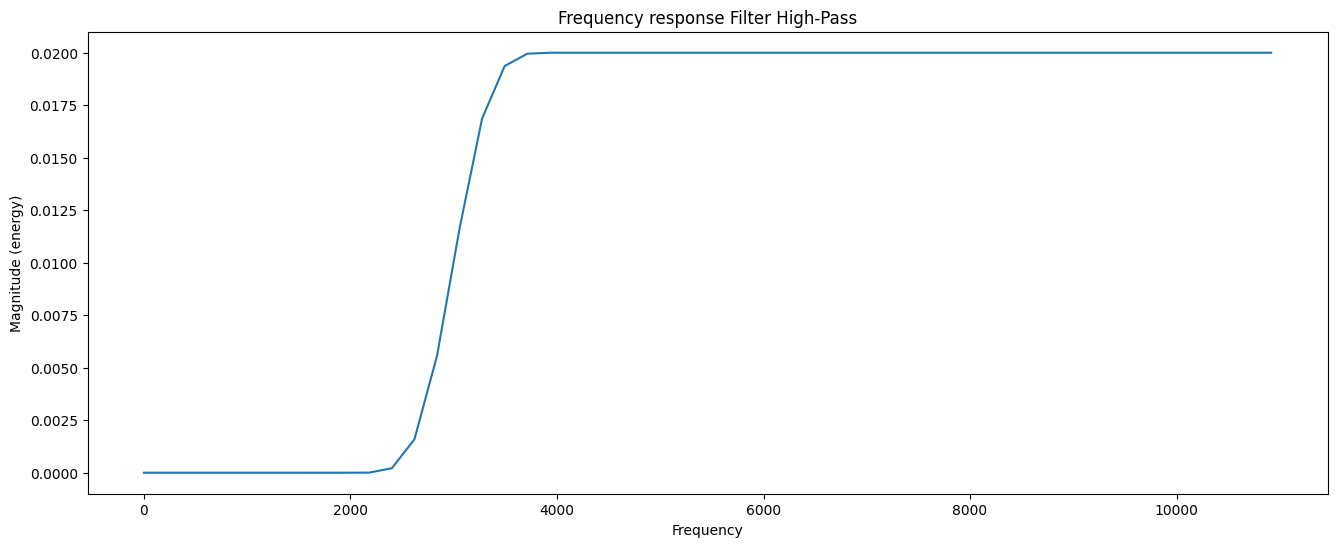

In [34]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(b_HP,Fs=sample_rate)
plt.title("Frequency response Filter High-Pass")
plt.show()

### b) Usando os coeficientes do filtro passa-altas (𝑏_𝐻𝑃) filtre o sinal de áudio original.

In [21]:
signal_filtered_hp = np.convolve(signal,b_HP)

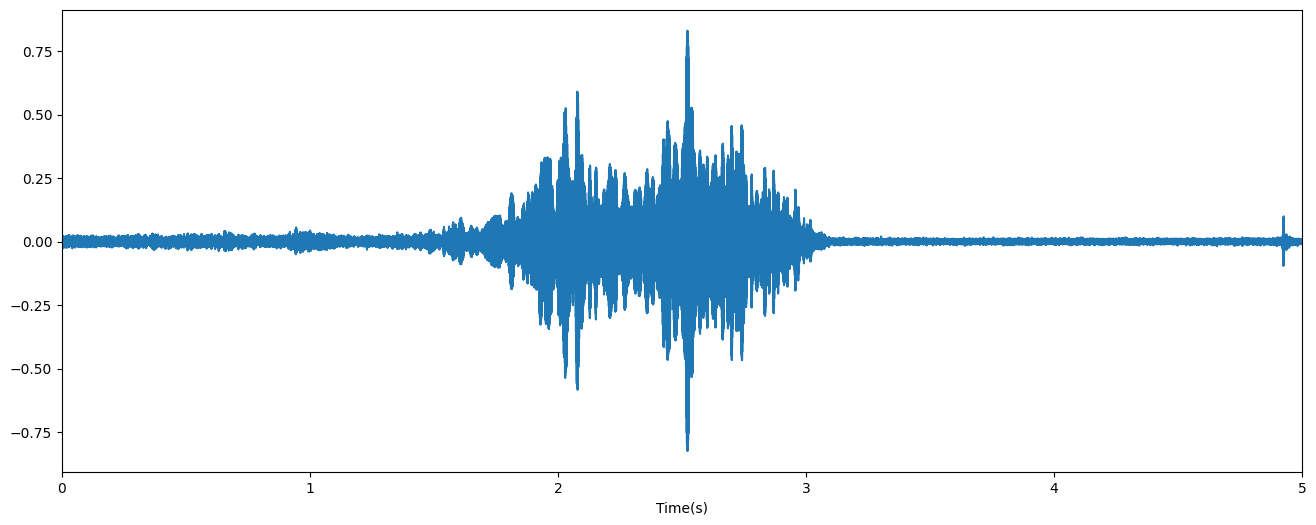

In [22]:
plt.figure(figsize=(16,6))
plt.plot(time,signal_filtered_hp[M-1:])
plt.xlabel("Time(s)")
plt.xlim((0,len(signal)*period))
plt.show()

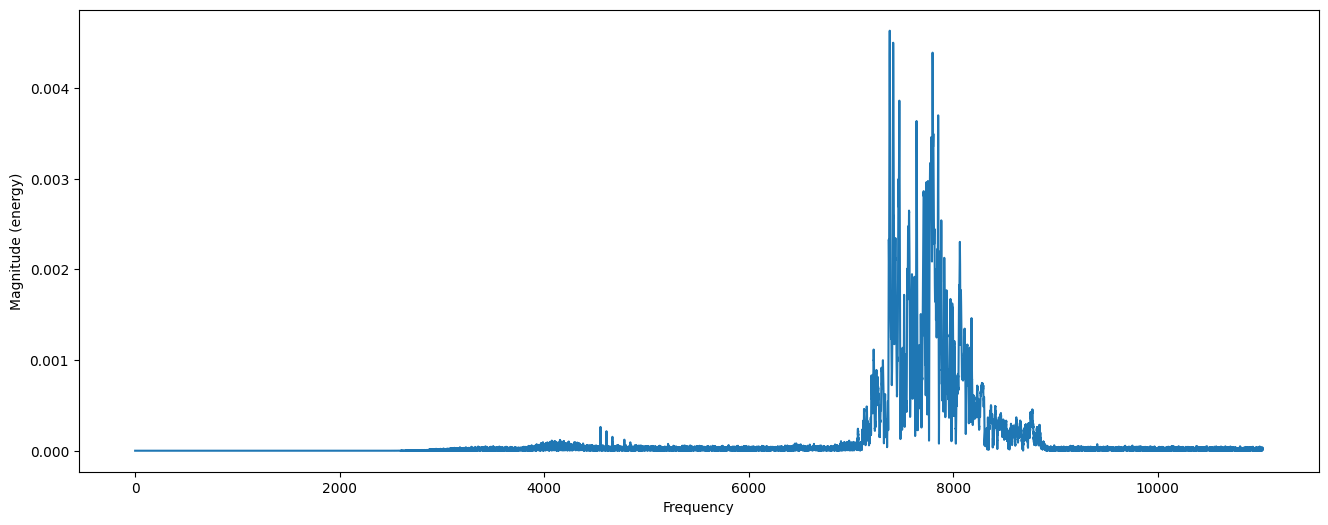

In [23]:
plt.figure(figsize=(16,6))
plt.magnitude_spectrum(signal_filtered_hp,Fs=sample_rate)
plt.show()

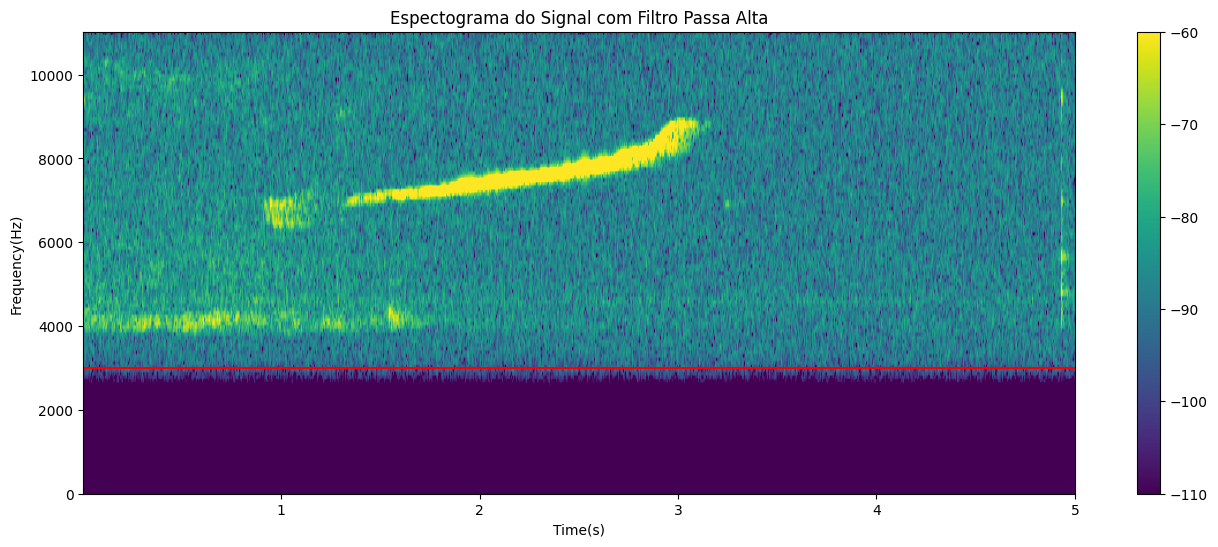

In [50]:
plt.figure(figsize=(16,6))
plt.specgram(signal_filtered_hp,Fs=sample_rate)
plt.axhline(y=3000, xmin=0, xmax=len(signal)*period , color='red')
plt.title("Espectograma do Signal com Filtro Passa Alta")
plt.xlabel("Time(s)")
plt.ylabel("Frequency(Hz)")
plt.colorbar()
plt.clim(-60, -100)
plt.show()

In [24]:
sf.write('prova2_filtrado_hp.wav',signal_filtered_hp,sample_rate)

### c) Por que os coeficientes do filtro 𝑏_𝐻𝑃 permitem obter uma resposta em frequência que atua como um sistema passa-altas ?

Para responder essa questao, vamos primeiro comparar os dois filtros

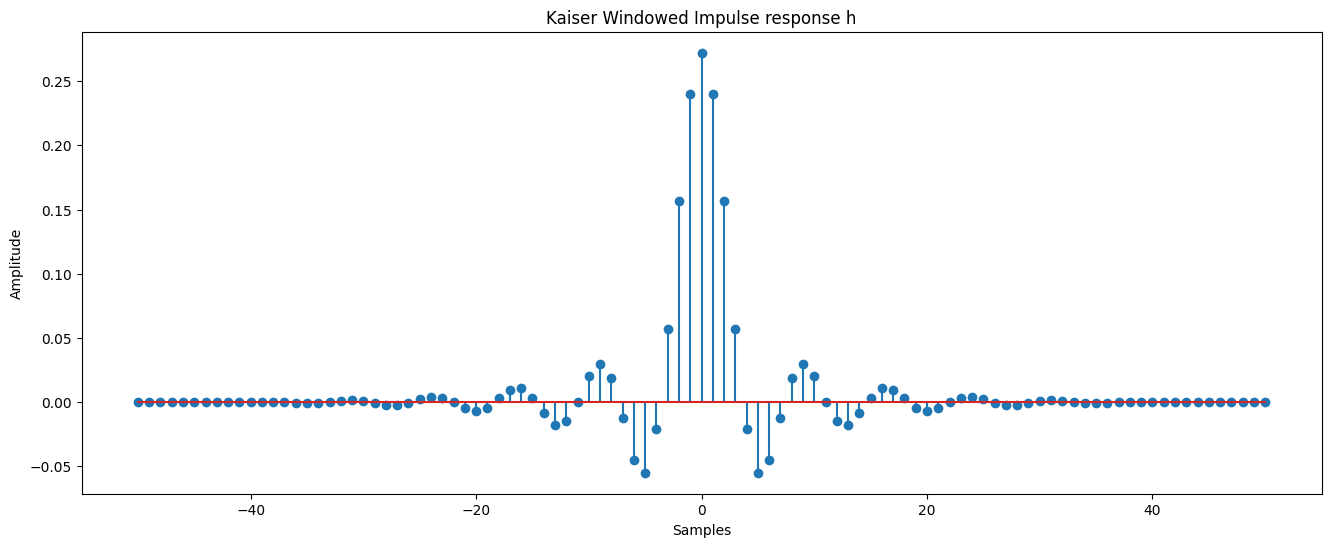

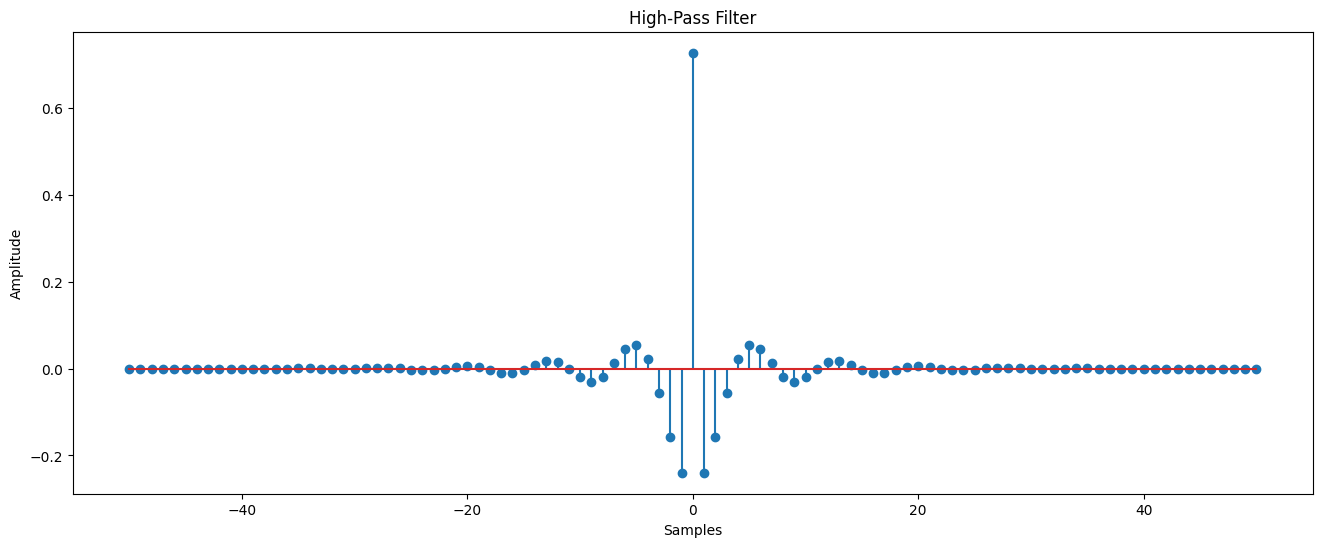

In [32]:
plt.figure(figsize=(16,6))
plt.stem(n1,hlp_kaiser)
plt.title("Kaiser Windowed Impulse response h")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

plt.figure(figsize=(16,6))
plt.stem(n1,b_HP)
plt.title("High-Pass Filter")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

Como podemos perceber, o filtro passa alta, é um complemento do filtro passa baixa, já que pela lógica se temos coeficientes que determinam um filtragem passando alguma coisa, caso usemos os coeficientes contrarios, teremos o contrario do que estava sendo filtrado antes.Por isso invertemos o sinal de todos os coeficientes do filtro passa baixa.Ficamos basicamente com um vetor ````-hlp````, entretanto ainda temos que somar com um impulso unitário, na qual ficamos com 

b_hp[0]= 1 - fc/(fs/2)

Essa soma com o impulso unitário, ocorre mediante a quanto das frequencias vamos deixar passsar.1 seria o caso de deixar passar todas as frequencias até fs/2, que é basicamente cortar todo o sinal no espectro.Conforme vamos diminuindo fc, vamos aumentando a quantidade de frequencia observada, começando de fs/2 para baixo. 

## Extra

In [51]:
# Function Filter Low Pass
def filter_fir_kaiser_low_pass(signal,fs,fc,n_coeficientes,atenuacao):
  wc = PI*fc/(fs/2)

  M1 = -(n_coeficientes-1)/2
  M2 = (n_coeficientes-1)/2
  n1 = np.arange(M1,M2+1)

  hlp = (wc/PI)*(np.sin(wc*n1))/(wc*n1)
  hlp[n1 == 0] = wc/PI  

  # Kaiser Window
  r = atenuacao # Controls the dBs below the mainlobe magnitude.
  beta = 0.1102*(r - 8.7)
  kaiser_window = np.kaiser(n_coeficientes,beta)

  #Obtain hlp into Kaiser Window
  hlp_kaiser = hlp * kaiser_window 
  signal_filtered = np.convolve(signal,hlp_kaiser) #Filtering the signal

  return signal_filtered[n_coeficientes-1:]



In [52]:
# Function Filter High-Pass
def filter_fir_kaiser_high_pass(signal,fs,fc,n_coeficientes,atenuacao):
  hlp_kaiser = filter_fir_kaiser_low_pass(signal,fs,fc,n_coeficientes,atenuacao)

  index_pos_max = np.where(hlp_kaiser == max(hlp_kaiser))[0][0]
  b_impulse = np.zeros(n_coeficientes)
  b_impulse[index_pos_max] = 1
  b_HP = b_impulse - hlp_kaiser

  signal_filtered_hp = np.convolve(signal,b_HP)

  return signal_filtered_hp[n_coeficientes-1:]